# Introduction

The World Happiness Report is a landmark survey of the state of global happiness. In the report, nations are scored and ranked Experts around the world use the happiness scores and rankings to assess the progress of different nations around the world. Some of the features impacting happiness score are economic production, social support, life expectancy, freedom, absence of corruption, and generosity.

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the year 2013-2016 and use the Gallup weights to make the estimates representative. 

In this notebook, we will use the Sci-Kit Learn Linear Regression module to predict happiness scores using closely correlated features. 

# Analysis

Let's begin our analysis by importing our data and the necessary libraries that we will be using throughout the notebook. 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


happy_2019 = pd.read_csv(r"C:\Users\Hatteras\Documents\Kaggle Datasets\2019.csv")
happy_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


For this analysis, we'll define the Score as our target, as we want to use the other features to predict the Score. 


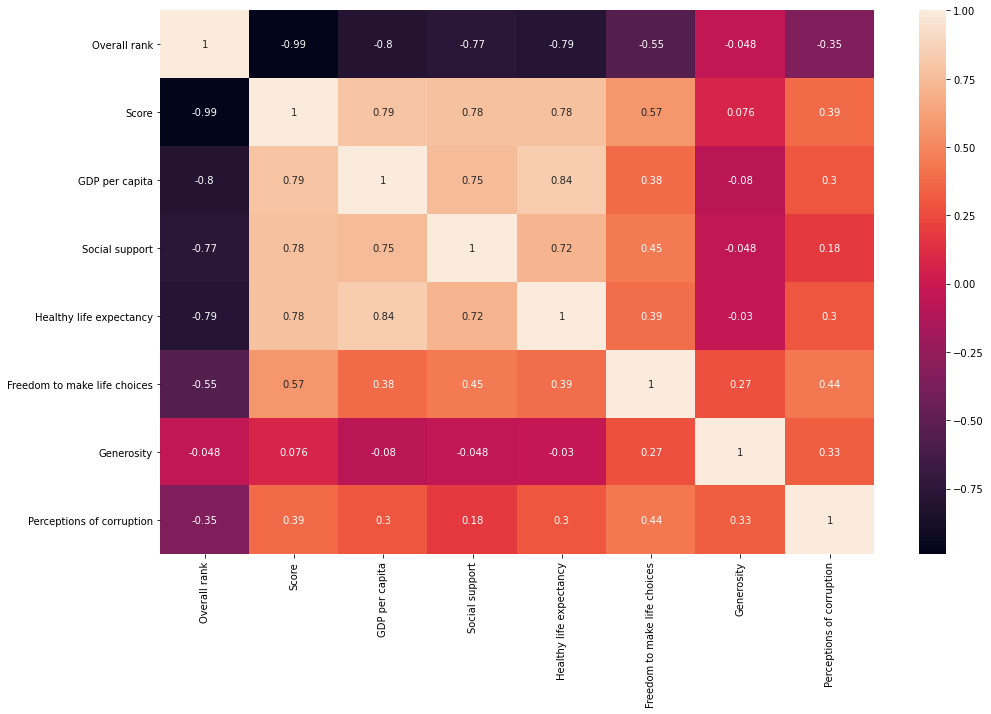

In [23]:
plt.figure(figsize=(16,10))
sns.heatmap(happy_2019.corr(), annot=True)
plt.show()

The squares closer to black or white will have stronger relationships between the two features. For example, there is a strong relationship between overall rank and score because the ranking comes directly from the score. We can also use Seaborn's Pairplot to get a sense of the relationships between features.

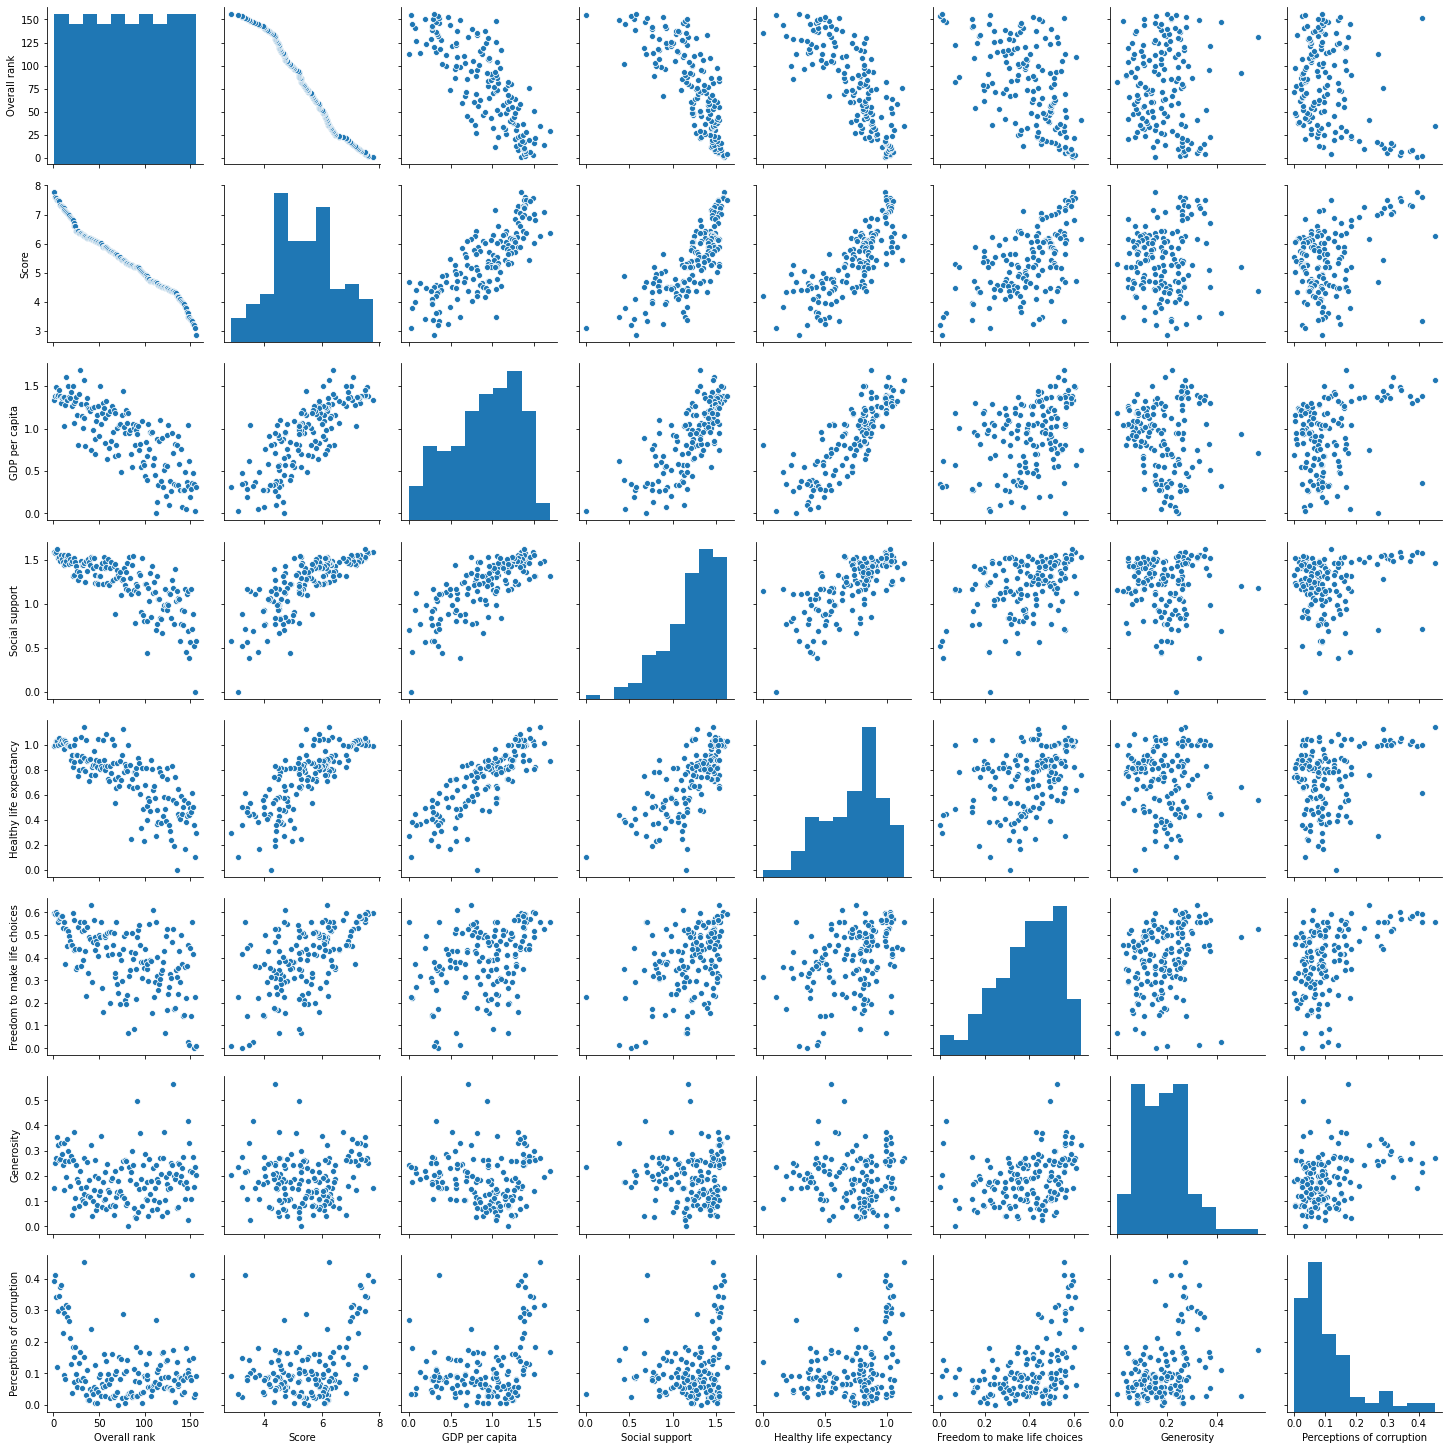

In [22]:
sns.pairplot(happy_2019);
plt.show()

Similar to the correlation heatmap, the pairplot is a mirror image of itself with the histograms being the axis of reflection. You can get a sense of the relationships between features by looking at just one half (below or above the histograms)

Let's look at a couple relationships using Sci Kit Learn's Linear Regression. When looking at machine learning with linear regression, we want to use features with strong relationships (that is, high r values from the correlation map). For this dataset, we can start by looking at the following relationships, as they have high r values from our correlation heatmap (+/- .7 or greater)

 - GDP Per Capita vs Score 
 - Life Expectancy vs Score
 - GDP Per Capita vs Life Expectancy
 
 Let's begin with GDP Per Capita vs Score first. 

In [4]:
#Define GDP per capita as our independent variable
X = happy_2019['GDP per capita'].values.reshape(-1,1)

In [18]:
#Define Score as a target to be predicted by GDP per capita
y = happy_2019['Score'].values

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
#instantiation of model
model = LinearRegression()

In [19]:
#Give the model the data
model.fit(X, y)

LinearRegression()

In [9]:
#beta in statistics
model.coef_

array([2.218148])

In [10]:
#c in statistics?
model.intercept_

3.3993451782924162

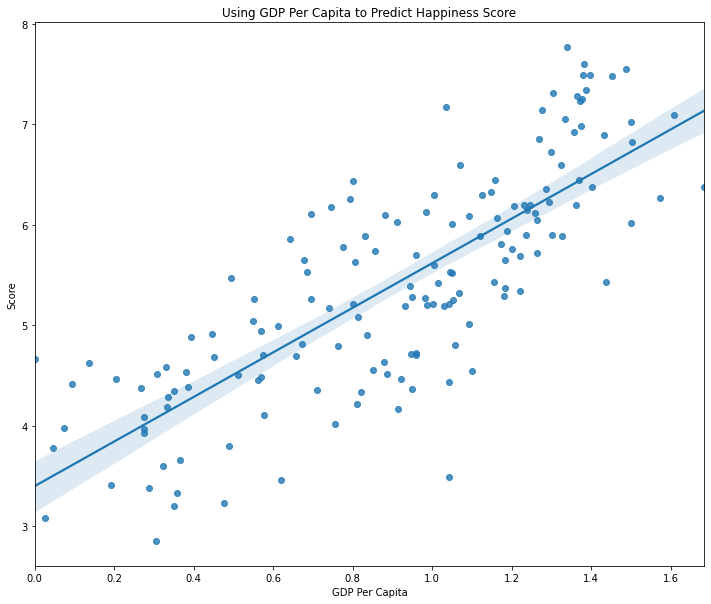

In [25]:
#Plot linear regression 
plt.figure(figsize=(12,10));
sns.regplot(X, y);
plt.xlabel('GDP Per Capita')
plt.ylabel("Score")
plt.title("Using GDP Per Capita to Predict Happiness Score")
plt.savefig("Happiness Regression.jpeg")
plt.show();

Now that we have our linear regression model, let's give the model a GDP per Capita value to see if it can accurately predict a happiness score. Let's pick a GDP Per Capita value of .8

In [17]:
#predict Score for GDP of .8
model.predict(np.array([.8]).reshape(1,-1))

array([5.17386358])

By plugging in .8 into our model for GDP Per Capita, the model gave us a score prediction of about 5.17. If we go to the scatterplot above and estimate the score of a country with a GDP Per Capita of .8, we do in fact see that we'll get a score of around 5.17. This tells us that our linear regression model did a pretty good job. As always though, models improve in accuracy as the amount of training data increases. So if we had more data points to add to our model, we would get a more accurate prediction of score based on GDP Per Capita. 